In [1]:
import numpy as np
import anndata
import pandas as pd
import scanpy as sc
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sc.settings.verbosity = 0

# Get number of cells and cell types for each time point

In [2]:
Path="/home/mgander/mouse_atlas/data"
ts=['E3.5', 'E4.5', 'E5.25', 'E5.5', 'E6.25', 'E6.5', 'E6.75', 'E7.0', 'E7.25', 'E7.5', 'E7.75', 'E8.0', 'E8.25', 'E8.5a', 'E8.5b', 'E9.5', 'E10.5', 'E11.5', 'E12.5', 'E13.5']
cells=[32, 80, 100, 120, 400, 660, 1720, 4500, 8200, 15000, 30000, 60000, 73000, 90000, 90000, 200000, 1100000, 2600000, 6000000, 13000000]
Cell_number_dict={ts[i]:cells[i] for i in range(20)}

In [3]:
D_number_of_cells={}
D_number_of_cell_types={}
for i in range(10):
    ts0=ts[i*2]
    ts1=ts[i*2+1]
    print(ts1)
    obs_local=sc.read(f"{Path}/Comb_anndatas/adata_{ts0}_{ts1}.h5ad").obs
    obs_local['embryonic_day']=[a.split(':')[0] for a in obs_local['cell_state']]
    obs_local['embryonic_day']=[a if a!='E7' else 'E7.0' for a in obs_local['embryonic_day']]
    obs_local['embryonic_day']=[a if a!='E8' else 'E8.0' for a in obs_local['embryonic_day']]
    
    ets=list(obs_local['embryonic_day'].value_counts().keys())
    ns=list(obs_local['embryonic_day'].value_counts())
    
    D_number_of_cells[ets[0]]=ns[0]
    D_number_of_cells[ets[1]]=ns[1]
    
    
    D_number_of_cell_types[ets[0]]=len(set(obs_local[obs_local['embryonic_day']==ets[0]]['cell_type']))
    D_number_of_cell_types[ets[1]]=len(set(obs_local[obs_local['embryonic_day']==ets[1]]['cell_type']))

E4.5
E5.5
E6.5
E7.0
E7.5


KeyboardInterrupt: 

# Plot number of cells

In [4]:
dfn=pd.DataFrame({'Time_point':ts, 'Number_of_cells':[D_number_of_cells[a] for a in ts],
                 'Number_of_cell_types':[D_number_of_cells[a] for a in ts]})

In [5]:
sns.set(rc={'figure.figsize':(10,4)})
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 300

[Text(0, 0.5, '')]

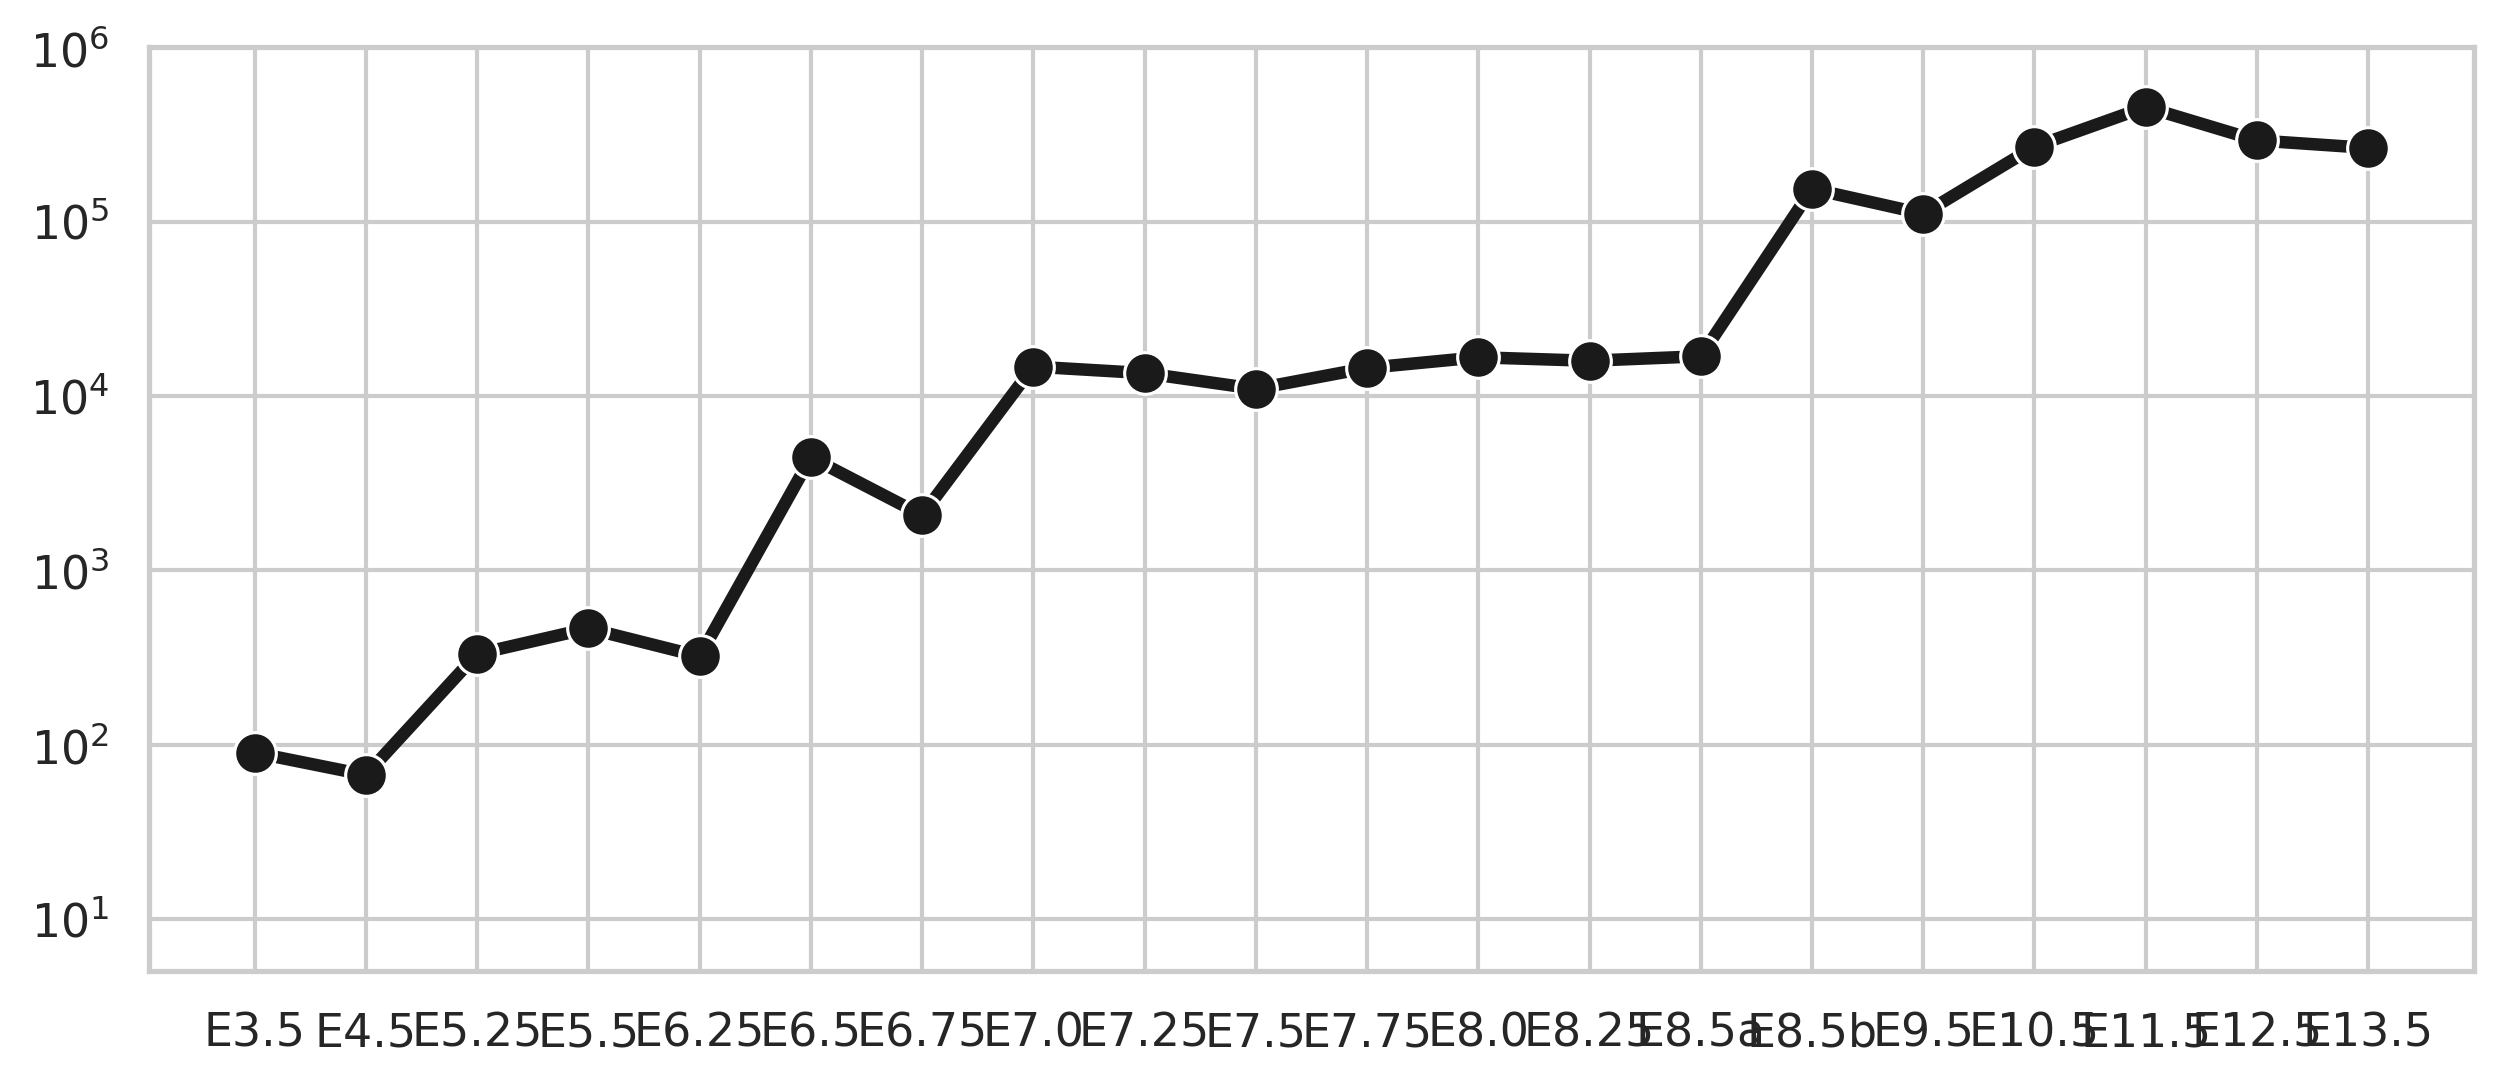

In [6]:
g=sns.lineplot(data=dfn, x='Time_point', y='Number_of_cells', linewidth=3, color='k', linestyle='-',
            marker='o', markersize=10)
plt.yscale('log')
plt.ylim(5,10**6)
g.set(xlabel=None)
g.set(ylabel=None)
#g.set(yticklabels=[])
#g.set(xticklabels=[])

# Load Weights-and-Biases benchmark

In [4]:
moscot_color=np.array([35,107,157])/255
rank10=np.array([217,234,202])/255
rank100=np.array([163,217,121])/255
rank1000=np.array([102,177,50])/255
rank2000=np.array([63,105,30])/255

palette=[rank10, rank100, rank1000, rank2000, moscot_color]

In [5]:
D_stage={}

pregast=['E3.5', 'E4.5', 'E5.25', 'E5.5', 'E6.25']
gast=['E6.5', 'E6.75', 'E7.0', 'E7.25', 'E7.5', 'E7.75', 'E8.0', 'E8.25']
organ=['E8.5a', 'E8.5b', 'E9.5', 'E10.5', 'E11.5', 'E12.5']

D_stage=D_stage|{pregast[i]:'Pregastrulation' for i in range(len(pregast))}
D_stage=D_stage|{gast[i]:'Gastrulation' for i in range(len(gast))}
D_stage=D_stage|{organ[i]:'Organogenesis' for i in range(len(organ))}

In [6]:
Df=pd.read_csv('wandb_export_2023-12-19T10_58_42.119+01_00.csv')
print(Df.columns)
Df=Df[['i', 'Rank', 'Time_Sinkhorn', 'tau1', 'Time_Evaluation', 'Apoptosis_rate', 'Accuracy_Germ', 'Accuracy_Curated', 'Iteration', 'Gamma']].copy()
Df=Df[np.isfinite(Df['i'])].copy()
Df['Starting_time_point']=[ts[int(i)] for i in Df['i']]

Index(['Name', 'State', 'Notes', 'User', 'Tags', 'Created', 'Runtime', 'Sweep',
       'Accuracy_Curated', 'Accuracy_Germ', 'Apoptosis_rate', 'Epsilon',
       'Gamma', 'Gamma*Epsilon', 'Iteration', 'Rank', 'Time_Evaluation',
       'Time_Sinkhorn', 'batch_size', 'i', 'tau1'],
      dtype='object')


In [14]:
Df=pd.read_csv('wandb_export_2023-12-27T12_05_45.062+01_00.csv')
print(Df.columns)
Df=Df[['i', 'Rank', 'Time_Sinkhorn', 'Time_Evaluation', 'Apoptosis_rate', 'Accuracy_Germ', 'Accuracy_Curated', 'Iteration', 'Gamma', 'tau1']].copy()
Df=Df[np.isfinite(Df['i'])].copy()
Df['Starting_time_point']=[ts[int(i)] for i in Df['i']]

Index(['Name', 'State', 'Notes', 'User', 'Tags', 'Created', 'Runtime', 'Sweep',
       'Accuracy_Curated', 'Accuracy_Germ', 'Apoptosis_rate', 'Epsilon',
       'Gamma', 'Gamma*Epsilon', 'Iteration', 'Rank', 'Time_Evaluation',
       'Time_Sinkhorn', 'batch_size', 'i', 'tau1'],
      dtype='object')


In [15]:
#Df=pd.concat([Df, df])

In [21]:
Df=Df.drop(77)
Df=Df.drop(78)
Df=Df.drop(79)
Df=Df.drop(134)

In [22]:
Df['Rank']=Df['Rank'].astype(int).astype('str')
Df['Rank']=[a if a!='-1' else 'full_rank' for a in Df['Rank']]

In [23]:
Df=Df.sort_values(['i', 'Rank']).copy()

In [24]:
Df=Df[(Df['Rank']=='full_rank')|(Df['Iteration']==1000)].copy()

In [25]:
Df=Df[Df['Gamma'].isin([500, np.NaN])].copy()

In [18]:
Df['Stage']=[D_stage[a] for a in Df['Starting_time_point']]
Df['Number_of_cell_types']=[D_number_of_cell_types[a] for a in Df['Starting_time_point']]

In [19]:
Df0=Df[(Df['Stage']=='Pregastrulation')&(Df['Apoptosis_rate'].between(0.1,0.15))].copy()
Df1=Df[(Df['Stage']=='Gastrulation')&(Df['Apoptosis_rate'].between(0.04,0.06))].copy()
Df2=Df[(Df['i']==13)].copy()
Df3=Df[(Df['Stage']=='Organogenesis')&(Df['Apoptosis_rate'].between(0.02,0.04))].copy()

In [20]:
Df=pd.concat([Df0, Df1, Df2, Df3])

In [21]:
Df=Df.sort_values('Accuracy_Curated')

In [22]:
Df=Df.drop_duplicates(['Rank', 'i']).copy()

In [23]:
Df=Df.sort_values('i')

# Germ layer cell type transitions evaluation

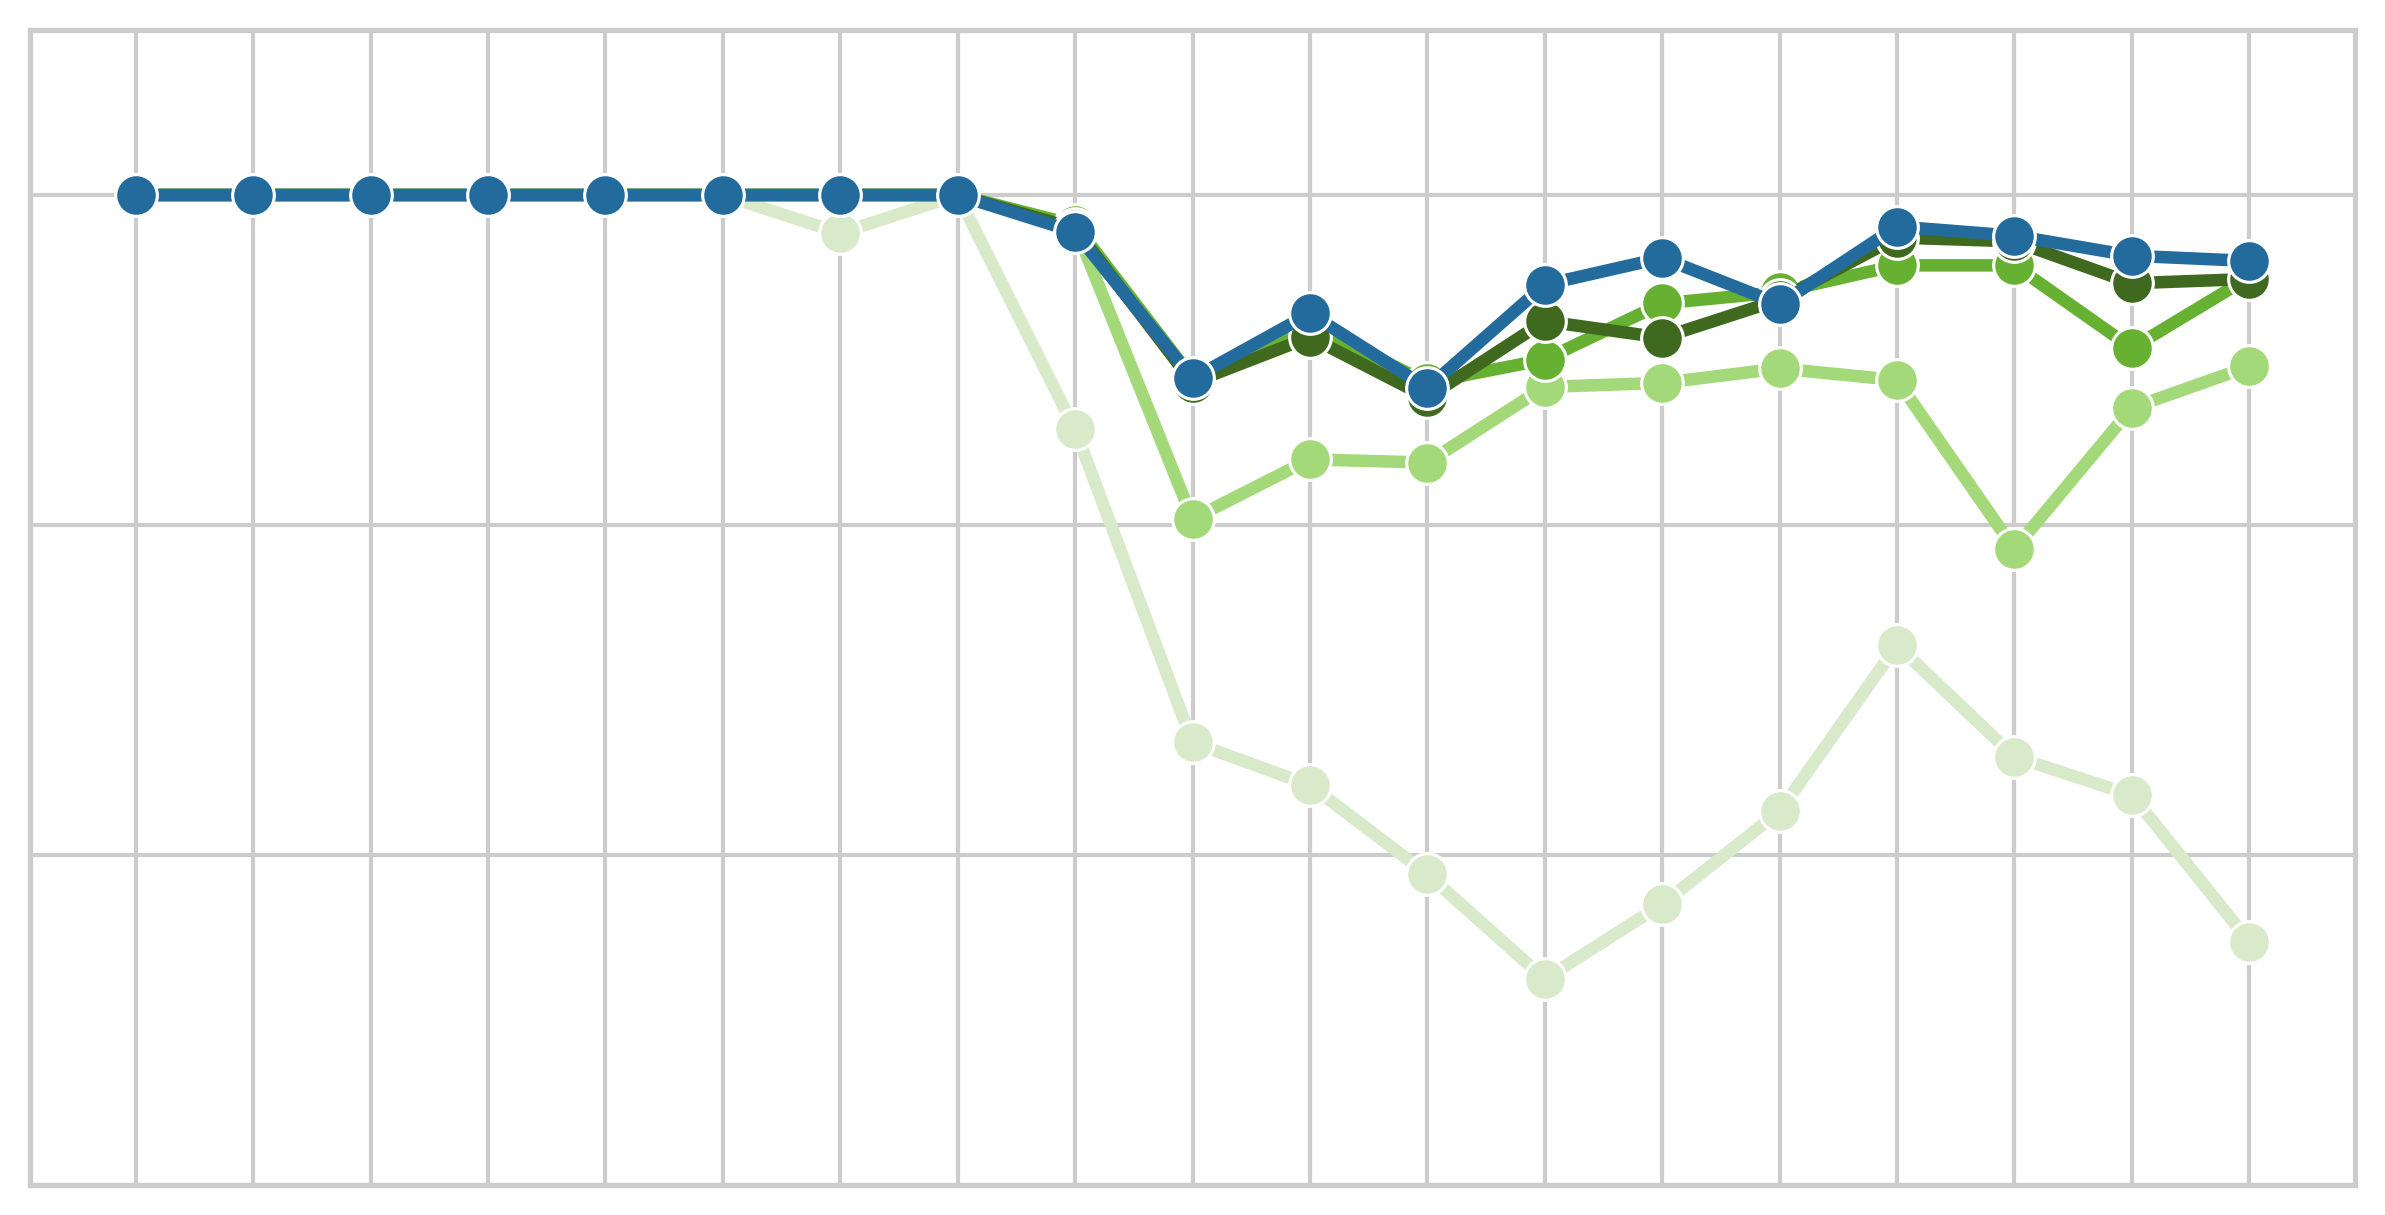

In [24]:
y='Accuracy_Germ'
hue='Rank'
ylim=(0.7,1.05)


sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 300

g=sns.lineplot(data=Df, x='Starting_time_point', y=y, hue=hue, 
                hue_order=['10', '100', '1000', '2000', 'full_rank'], linewidth=3,
         palette=palette, linestyle='-', marker='o', markersize=10)
plt.ylim(ylim)
plt.xlabel('')
plt.ylabel('')
g.set_yticks([0.7,0.8,0.9,1])
g.set(yticklabels=[])
g.set(xticklabels=[])
plt.legend('',frameon=False)

### Barplots

In [25]:
ss=[]
rs=[]
ac=[]
for s in ['Pregastrulation', 'Gastrulation', 'Organogenesis']:
    for r in ['full_rank', '10', '100', '1000', '2000']:
        ss.append(s)
        rs.append(r)
        dfs=Df[(Df['Rank']==r)&(Df['Stage']==s)]
        ac.append(np.average(dfs['Accuracy_Germ'], weights=dfs['Number_of_cell_types']))
Dfc=pd.DataFrame({'Rank':rs, 'Stage':ss, 'Weighted_accuracy':ac})
Dfc

,Rank,Stage,Weighted_accuracy
0,full_rank,Pregastrulation,1.000000
1,10,Pregastrulation,1.000000
2,100,Pregastrulation,1.000000
3,1000,Pregastrulation,1.000000
4,2000,Pregastrulation,1.000000
5,full_rank,Gastrulation,0.966713
6,10,Gastrulation,0.844451
7,100,Gastrulation,0.941123
8,1000,Gastrulation,0.961811
9,2000,Gastrulation,0.962442


(0.7, 1.05)

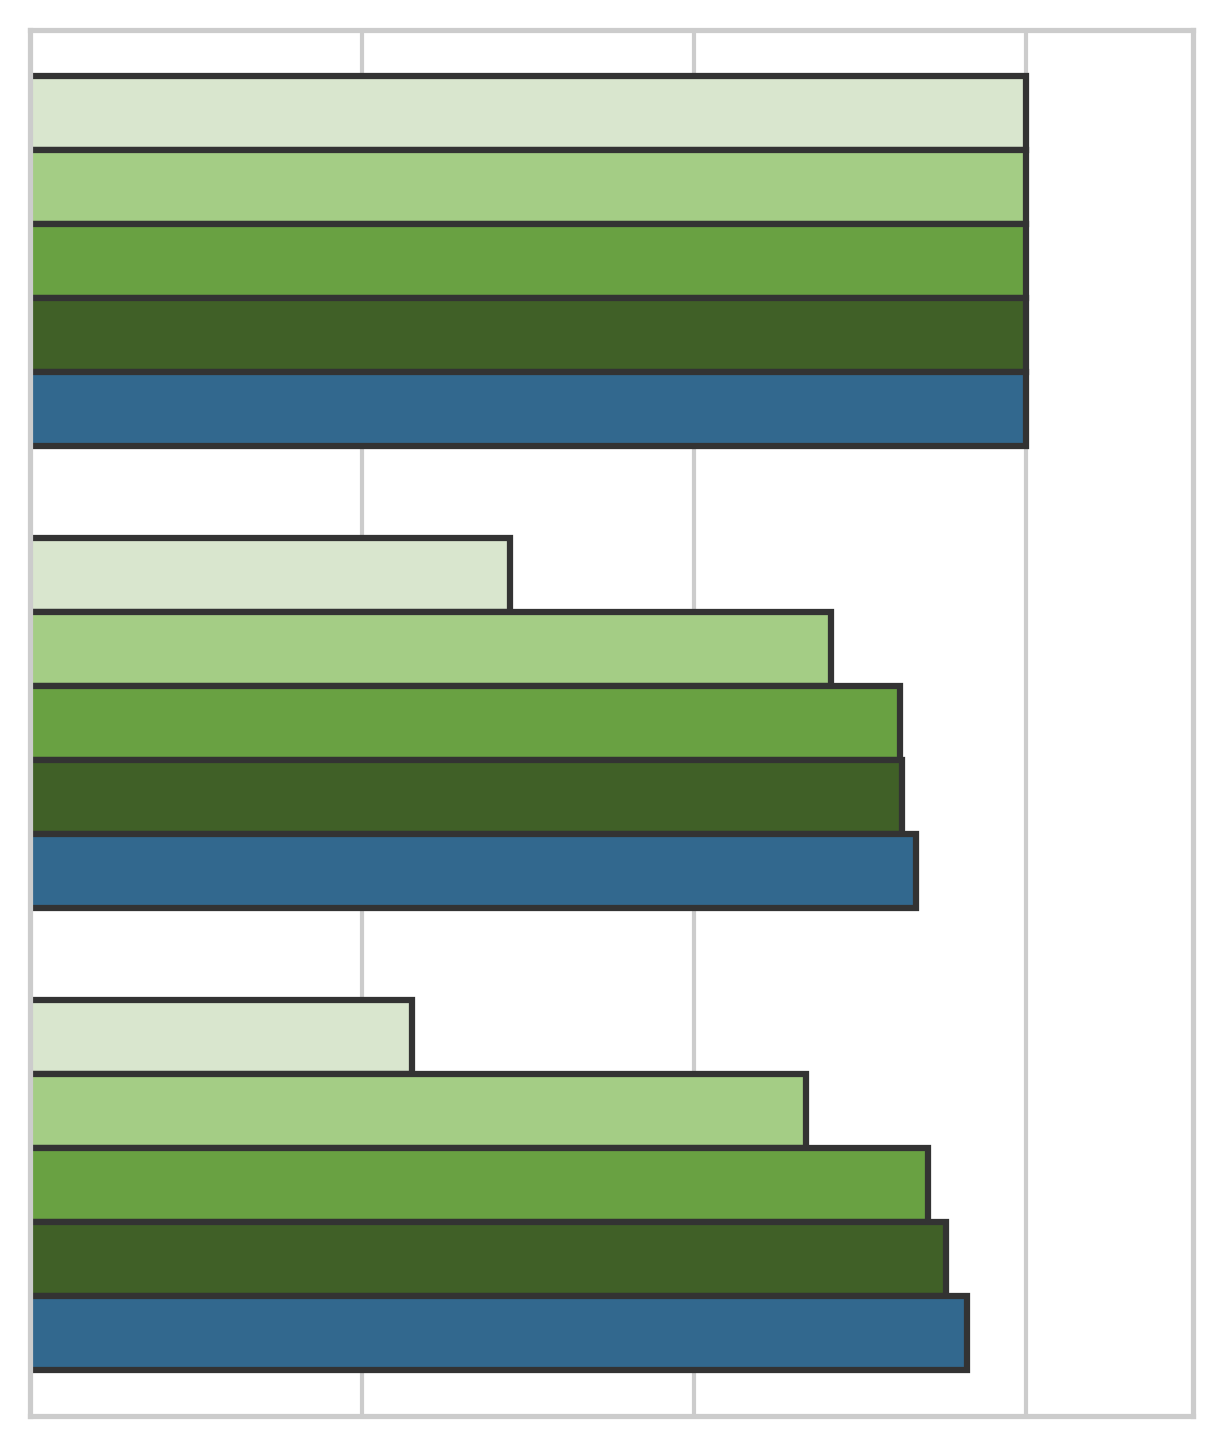

In [26]:
sns.set(rc={'figure.figsize':(5,6)})
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 300

# Germ layer transitions
g0=sns.barplot(data=Dfc, x='Weighted_accuracy', y="Stage", hue='Rank',  
               hue_order=['10', '100', '1000', '2000', 'full_rank'],
               palette=palette, linewidth=1.5, edgecolor='0.2')
plt.xlabel('')
plt.ylabel('')
g.set(yticklabels=[])
g.set(xticklabels=[])
plt.legend('',frameon=False)
plt.xticks(ticks=[0.7,0.8,0.9,1], labels=[])
plt.yticks(ticks=plt.yticks()[0], labels=[])
plt.xlim(0.7,1.05)

# Curated cell type transitions evaluation

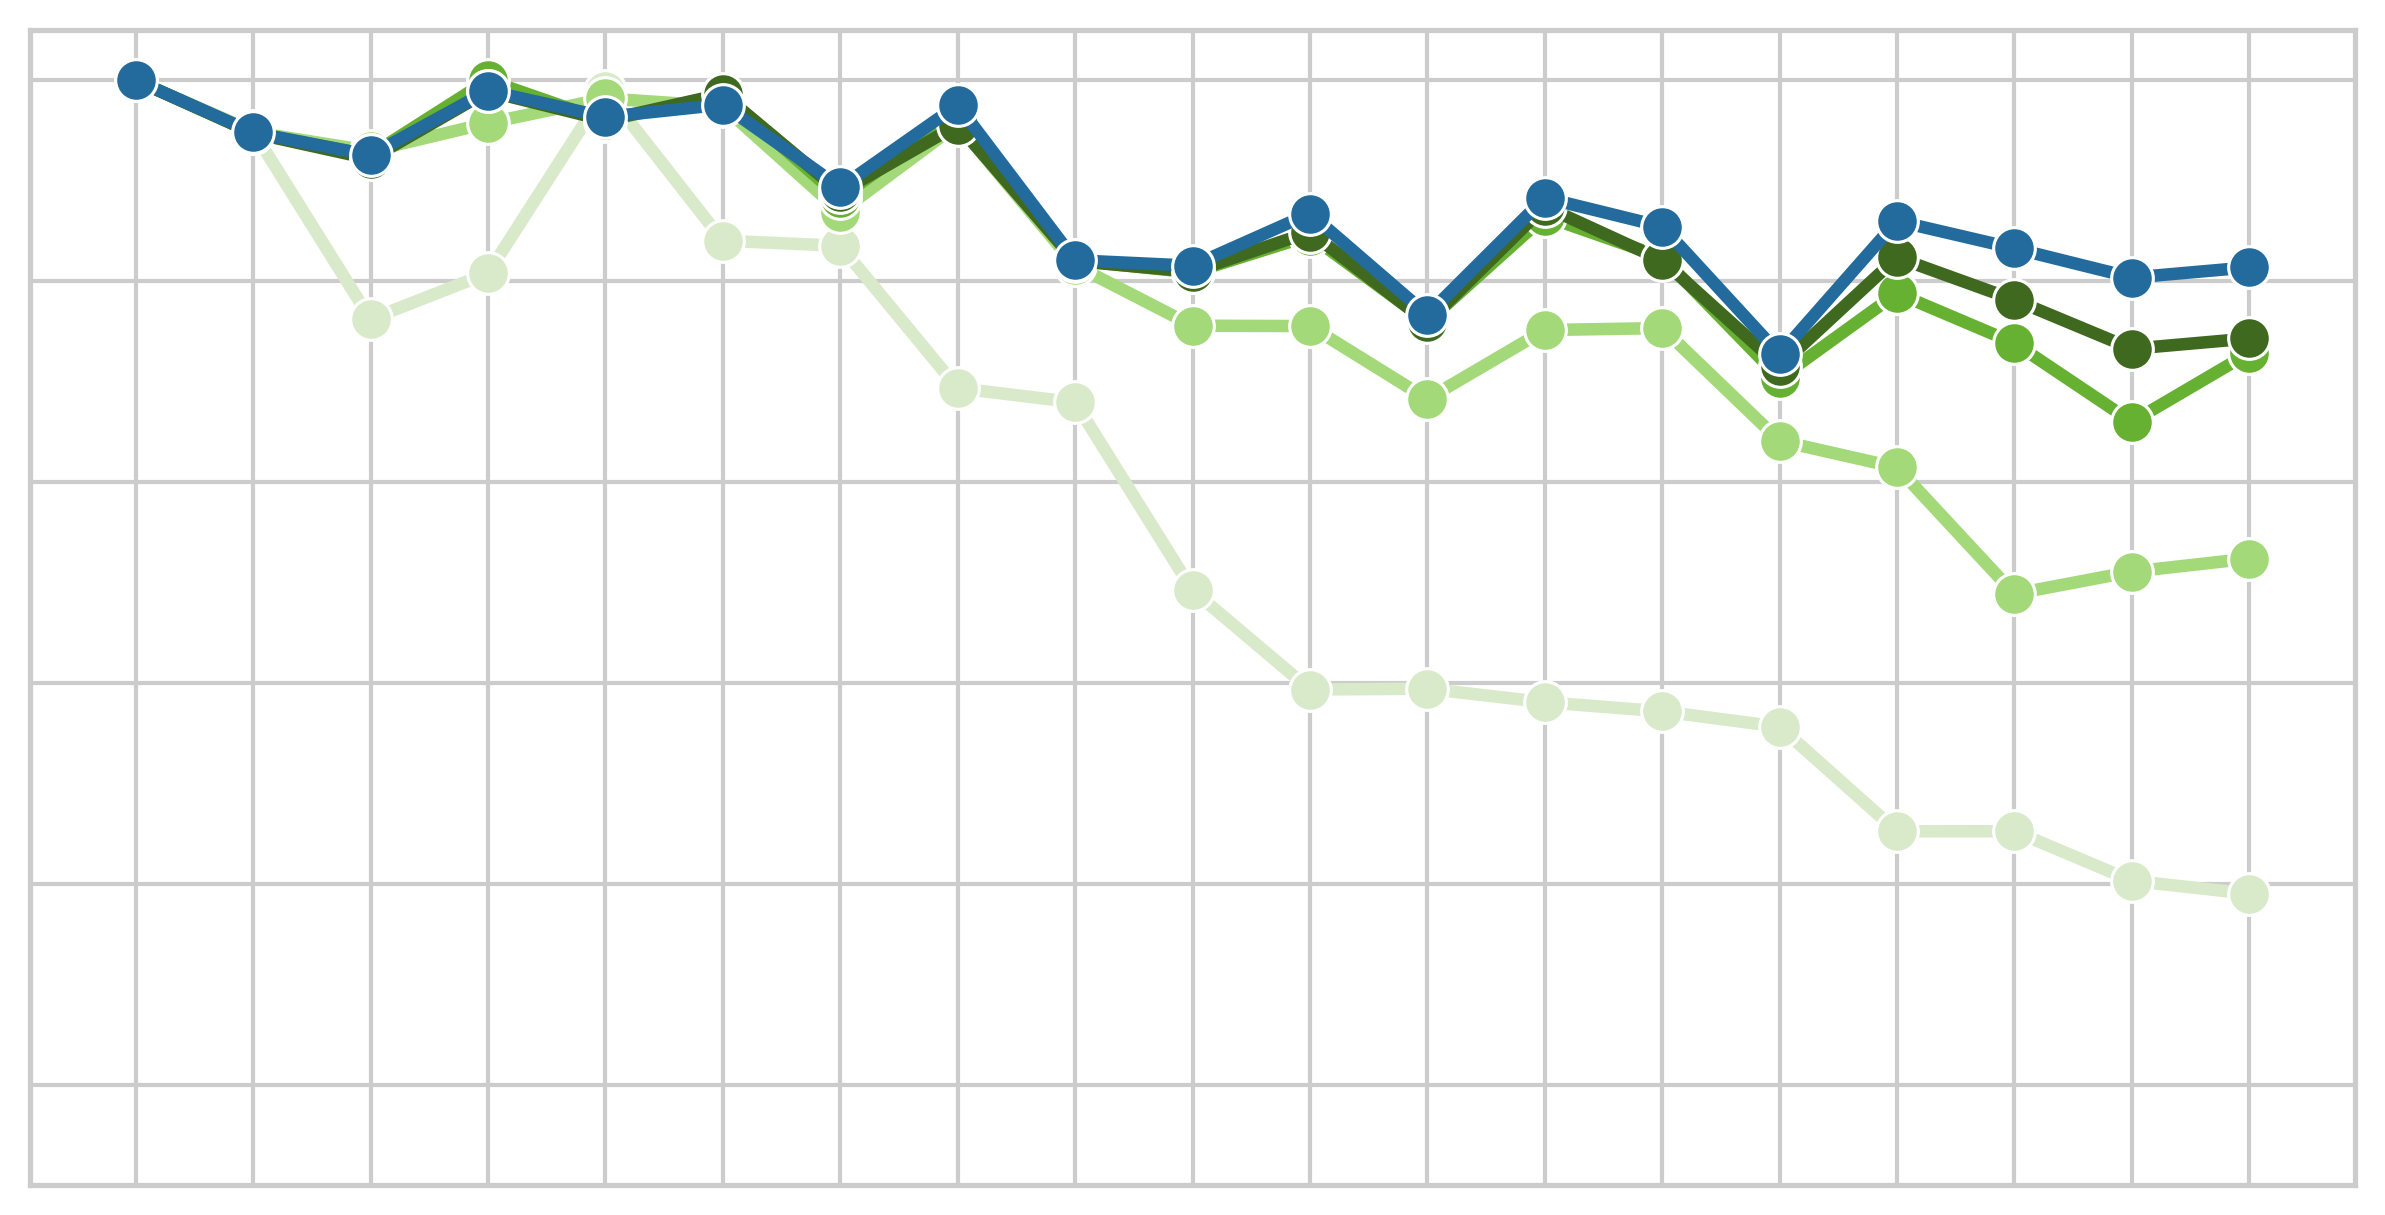

In [27]:
y='Accuracy_Curated'
hue='Rank'
ylim=(-0.1,1.05)


sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 300

g=sns.lineplot(data=Df, x='Starting_time_point', y=y, hue=hue, 
                hue_order=['10', '100', '1000', '2000', 'full_rank'], linewidth=3,
         palette=palette, linestyle='-', marker='o', markersize=10)
plt.ylim(ylim)
plt.xlabel('')
plt.ylabel('')
g.set(yticklabels=[])
g.set(xticklabels=[])
plt.legend('',frameon=False)

### Barplots

In [28]:
ss=[]
rs=[]
ac=[]
for s in ['Pregastrulation', 'Gastrulation', 'Organogenesis']:
    for r in ['full_rank', '10', '100', '1000', '2000']:
        ss.append(s)
        rs.append(r)
        dfs=Df[(Df['Rank']==r)&(Df['Stage']==s)]
        ac.append(np.average(dfs['Accuracy_Curated'], weights=dfs['Number_of_cell_types']))
Dfc=pd.DataFrame({'Rank':rs, 'Stage':ss, 'Weighted_accuracy':ac})
Dfc

,Rank,Stage,Weighted_accuracy
0,full_rank,Pregastrulation,0.962453
1,10,Pregastrulation,0.878506
2,100,Pregastrulation,0.959435
3,1000,Pregastrulation,0.964345
4,2000,Pregastrulation,0.960401
5,full_rank,Gastrulation,0.852393
6,10,Gastrulation,0.494844
7,100,Gastrulation,0.775878
8,1000,Gastrulation,0.841486
9,2000,Gastrulation,0.843511


([<matplotlib.axis.YTick at 0x7fb201296b50>,
 [Text(0, 0, ''), Text(0, 1, ''), Text(0, 2, '')])

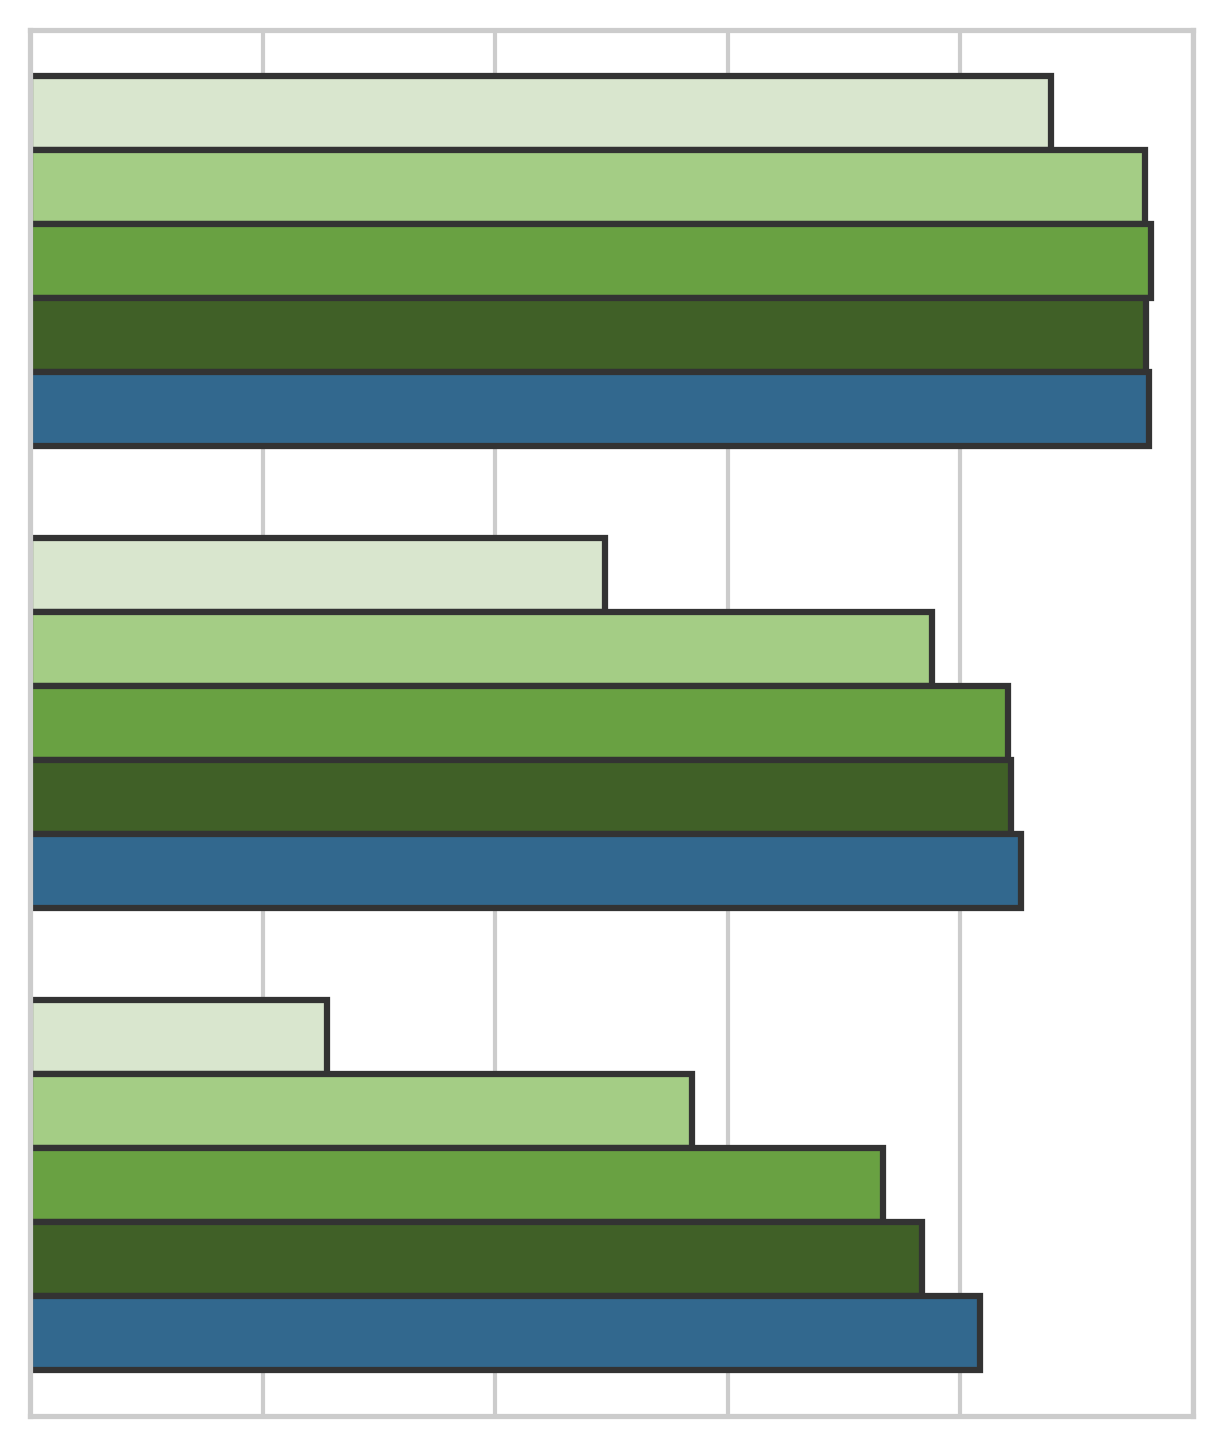

In [29]:
sns.set(rc={'figure.figsize':(5,6)})
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 300

# Germ layer transitions
g0=sns.barplot(data=Dfc, x='Weighted_accuracy', y="Stage", hue='Rank',  
               hue_order=['10', '100', '1000', '2000', 'full_rank'],
               palette=palette, linewidth=1.5, edgecolor='0.2')
plt.xlabel('')
plt.ylabel('')
plt.xlim(0,1)
g.set(yticklabels=[])
g.set(xticklabels=[])
plt.legend('',frameon=False)
plt.xticks(ticks=plt.xticks()[0], labels=[])
plt.yticks(ticks=plt.yticks()[0], labels=[])

# Plot running times

In [ ]:
# (I saved times in hours so far)

In [38]:
Df['Sinkhorn_time_in_min']=Df['Time_Sinkhorn']*60

In [39]:
Df['Eval_time_in_min']=Df['Time_Evaluation']*60

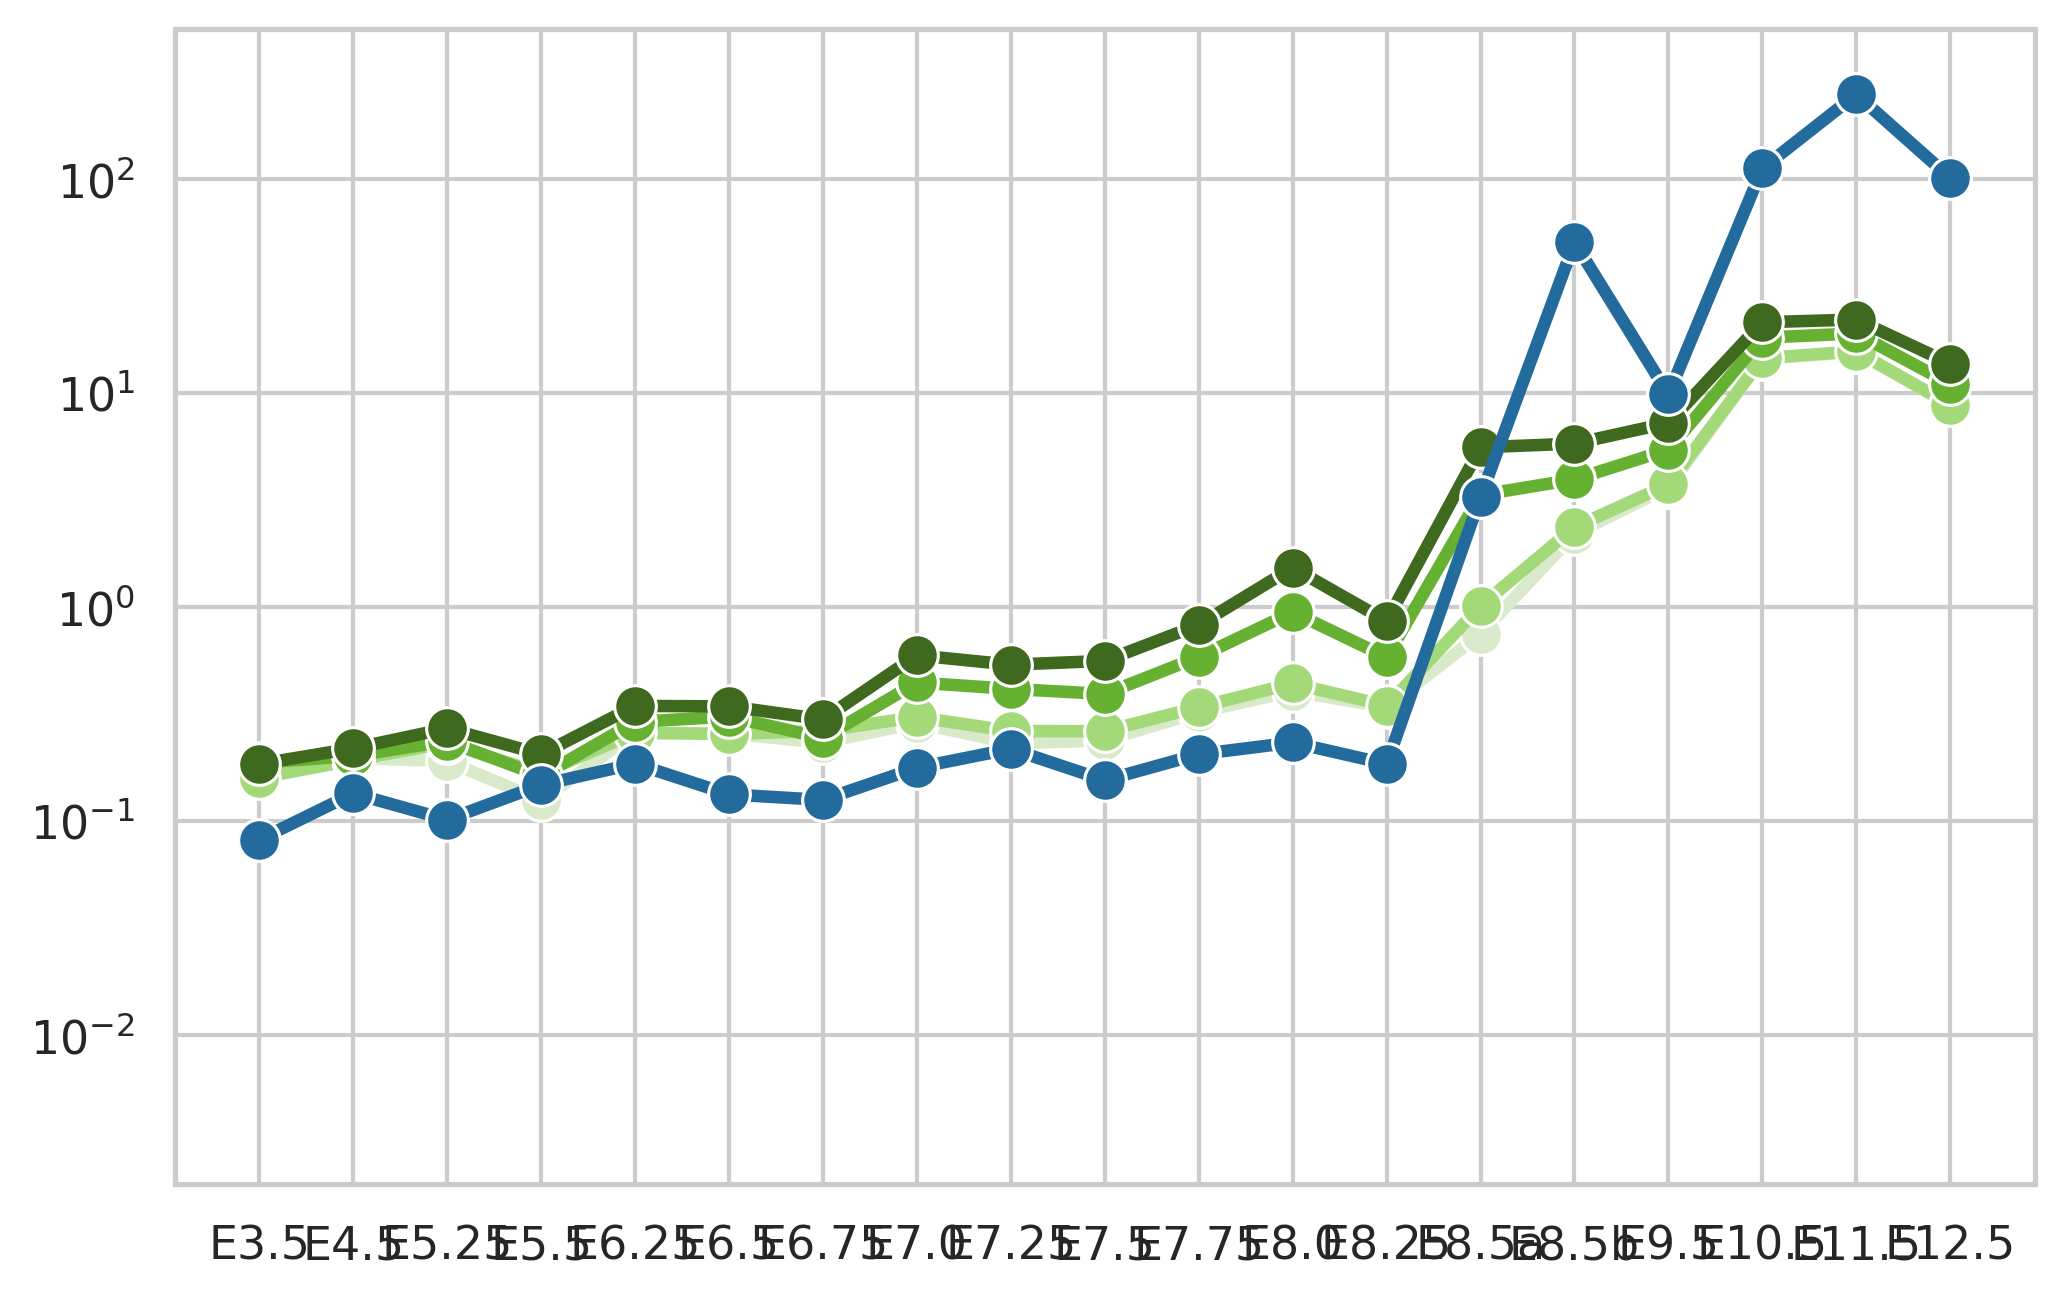

In [51]:
hue='Rank'
#ylim=(-0.1,1.05)

sns.set(rc={'figure.figsize':(8,5)})
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 300

g=sns.lineplot(data=Df, x='Starting_time_point', y='Sinkhorn_time_in_min', hue=hue, 
                hue_order=['10', '100', '1000', '2000', 'full_rank'], linewidth=3,
         palette=palette, linestyle='-', marker='o', markersize=10)
plt.xlabel('')
plt.ylabel('')
#g.set(xticklabels=[])
plt.yscale('log')
plt.ylim(0.002, 5*10**2)
#g.set(yticklabels=[])
plt.legend('',frameon=False)

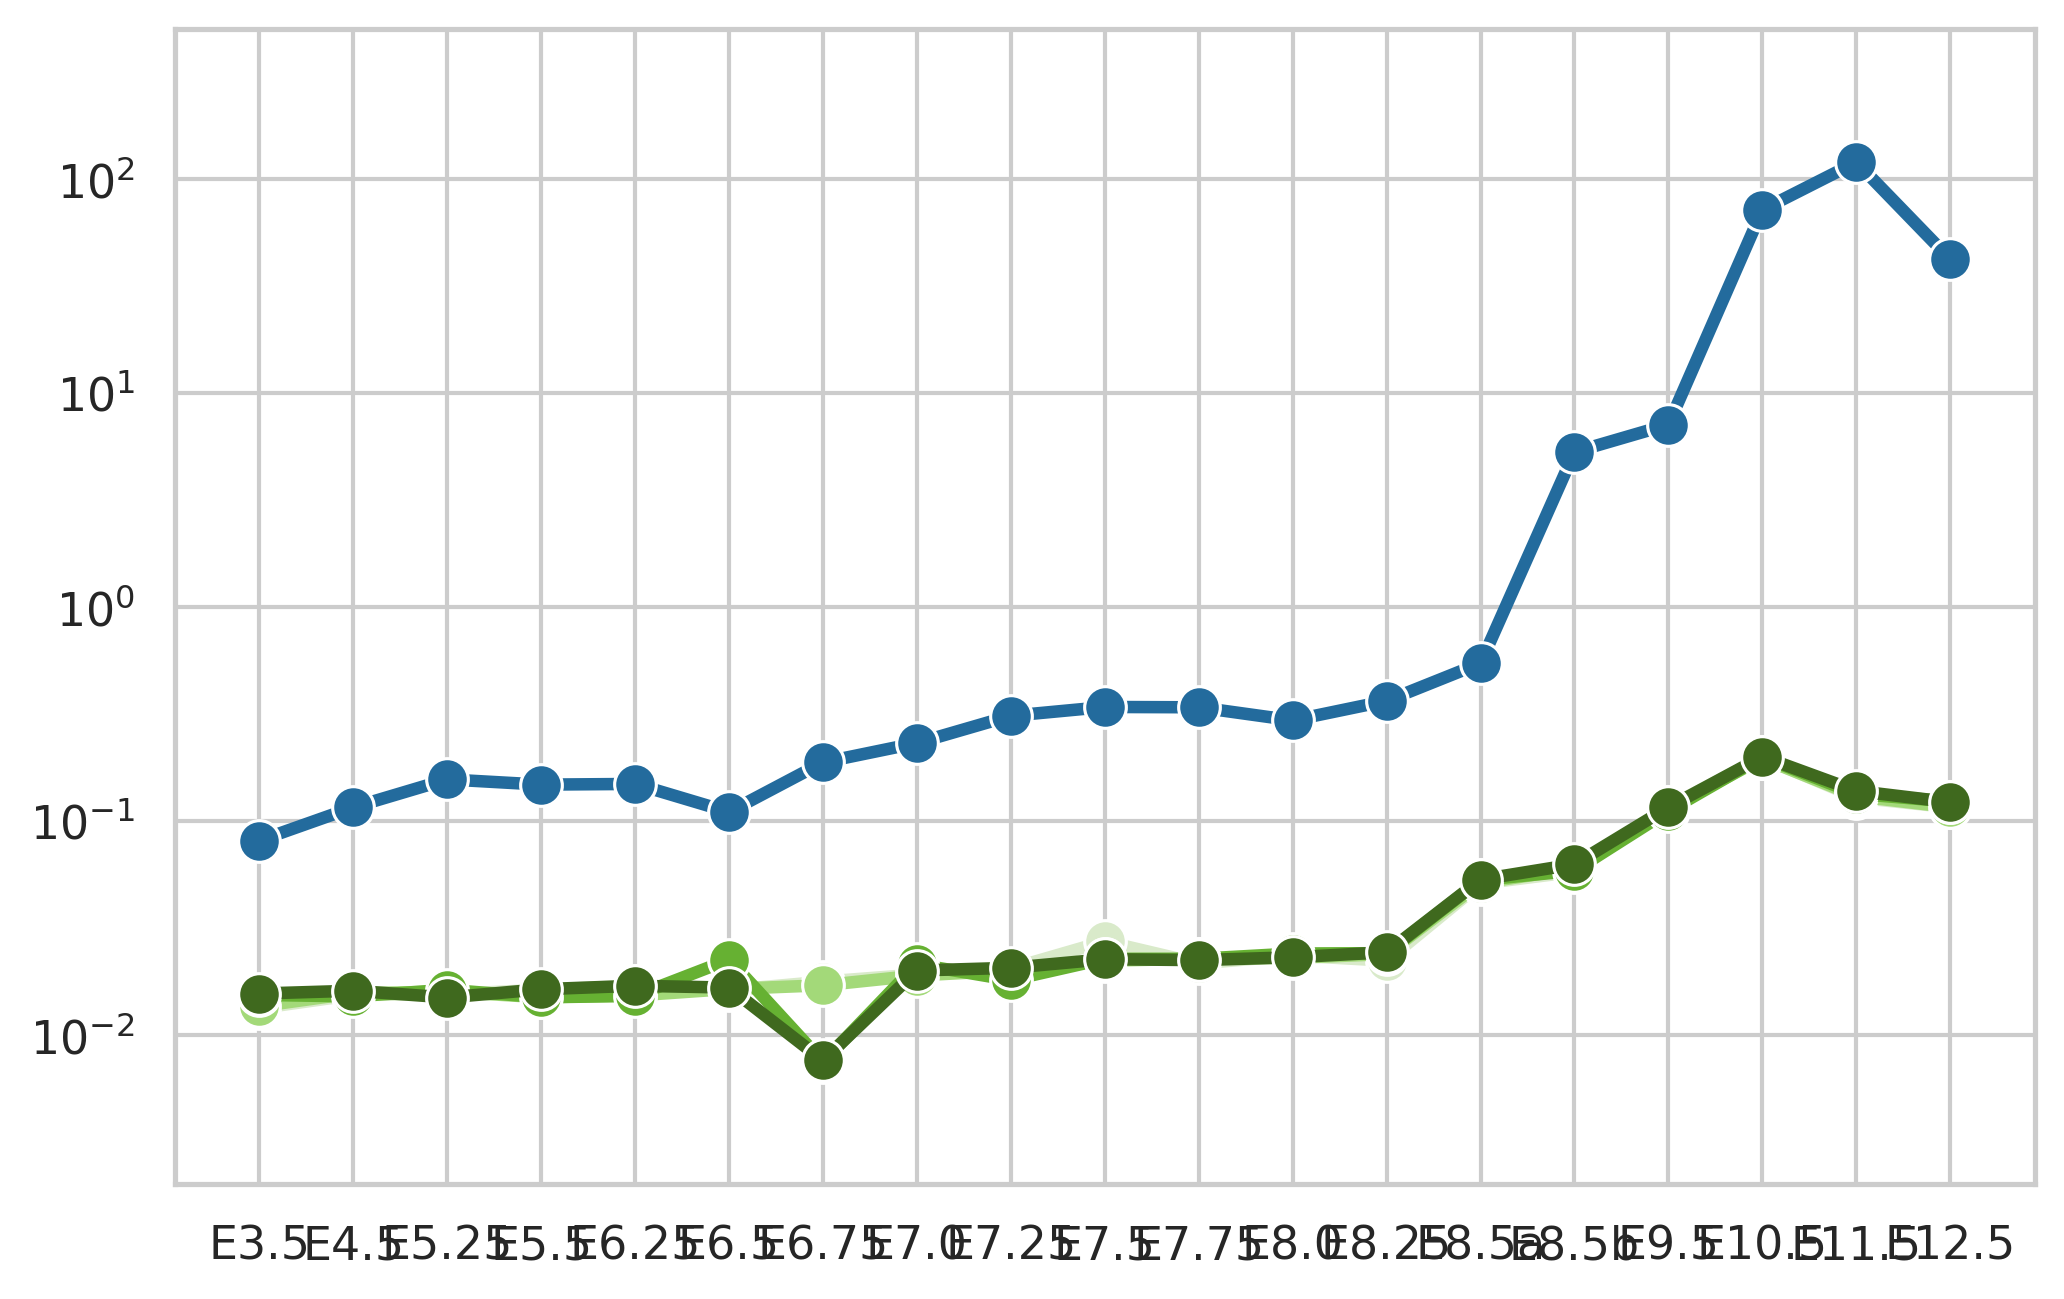

In [52]:
hue='Rank'
#ylim=(-0.1,1.05)

sns.set(rc={'figure.figsize':(8,5)})
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 300

g=sns.lineplot(data=Df, x='Starting_time_point', y='Eval_time_in_min', hue=hue, 
                hue_order=['10', '100', '1000', '2000', 'full_rank'], linewidth=3,
         palette=palette, linestyle='-', marker='o', markersize=10)
plt.xlabel('')
plt.ylabel('')
#g.set(xticklabels=[])
plt.yscale('log')
plt.ylim(0.002, 5*10**2)
#g.set(yticklabels=[])
plt.legend('',frameon=False)